<a href="https://www.kaggle.com/code/khushboos/house-prices?scriptVersionId=117919713" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## 1. Read the CSV files

In [2]:
# Reading the CSV files 
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
# data_description = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt",sep=" ")
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_Id = test_data['Id']

In [3]:
# Check the Not available values in the columns 
print(f"Train data :\n\n{train_data.isnull().sum()}\n\n\nTest data :\n\n{test_data.isnull().sum()}")

Train data :

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


Test data :

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [4]:
print(f"shape : {train_data.shape}\nDuplicate Values :{train_data.duplicated().sum()}")

shape : (1460, 81)
Duplicate Values :0


As the above code cell's result does not give us the clear view wheather the null values are present in those columns or not. So, we need to use the Plots to visualize this data.

## 2. Data Preprocessing 
Visualzing the House Price data using the matlotlib.pyplot. we are checking for the null values and the data distribution. 

<AxesSubplot:>

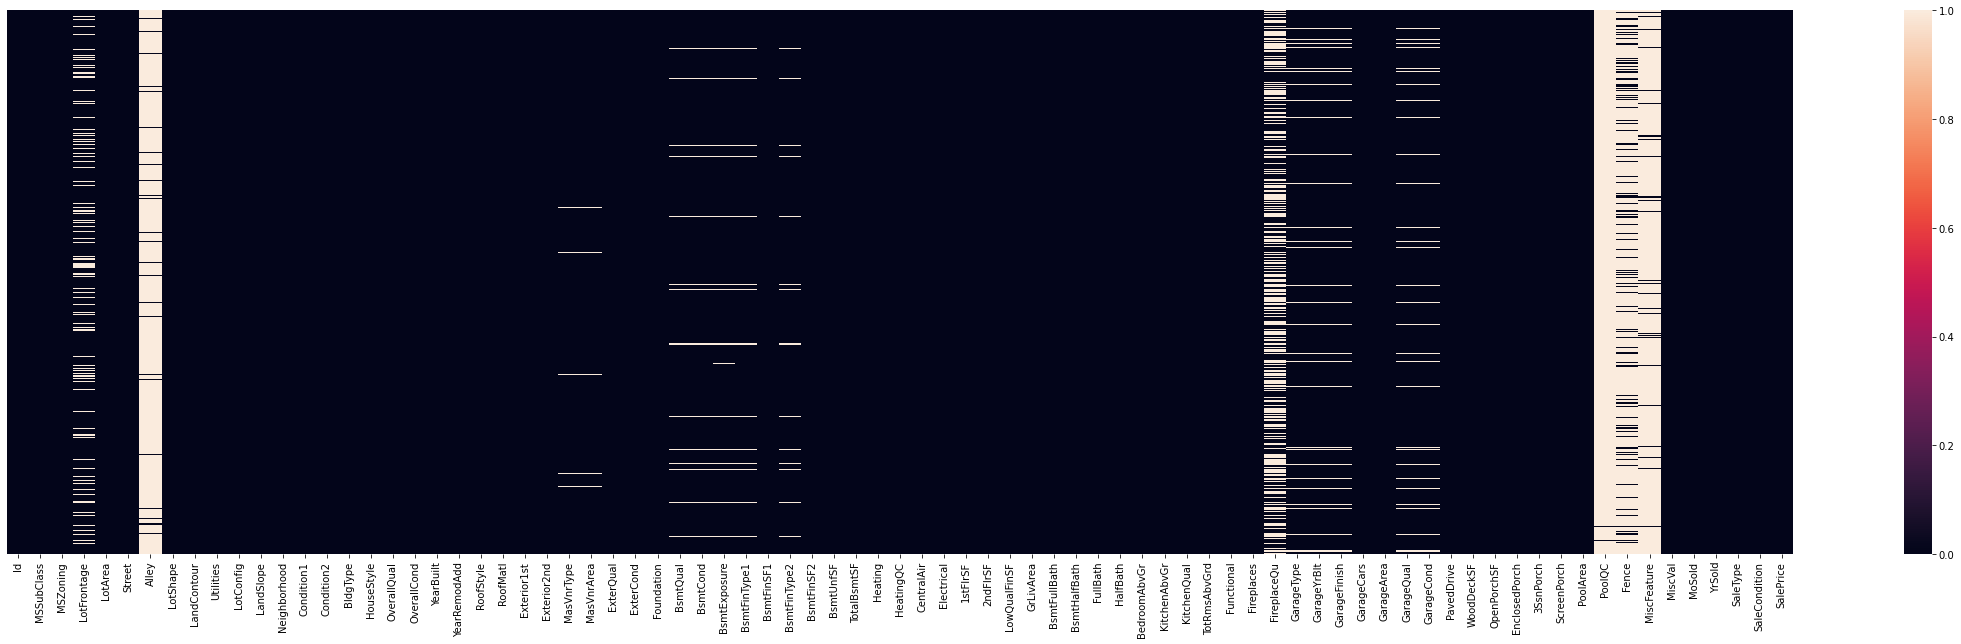

In [5]:
fig, ax = plt.subplots(figsize=(40,10))
sns.heatmap(data=train_data.isnull(), yticklabels = False, ax=ax)

In [6]:
# print(train_data['BsmtExposure'].isnull().sum(),\
#       train_data['BsmtCond'].isnull().sum(),\
#       train_data['BsmtFinType1'].isnull().sum(),\
#       train_data['BsmtFinType2'].isnull().sum())

train_data['FireplaceQu'].fillna("No", inplace=True)
train_data['BsmtCond'].fillna("No", inplace=True)
train_data['BsmtExposure'].fillna("No", inplace=True)
train_data['BsmtFinType1'].fillna("No", inplace=True)
train_data['BsmtFinType2'].fillna("No", inplace=True)


In [7]:
print(train_data['BsmtExposure'].isnull().sum(),\
      train_data['BsmtFinType1'].isnull().sum(),\
      train_data['BsmtFinType2'].isnull().sum(),\
      train_data['FireplaceQu'].isnull().sum(),\
      train_data['BsmtCond'].isnull().sum())

0 0 0 0 0


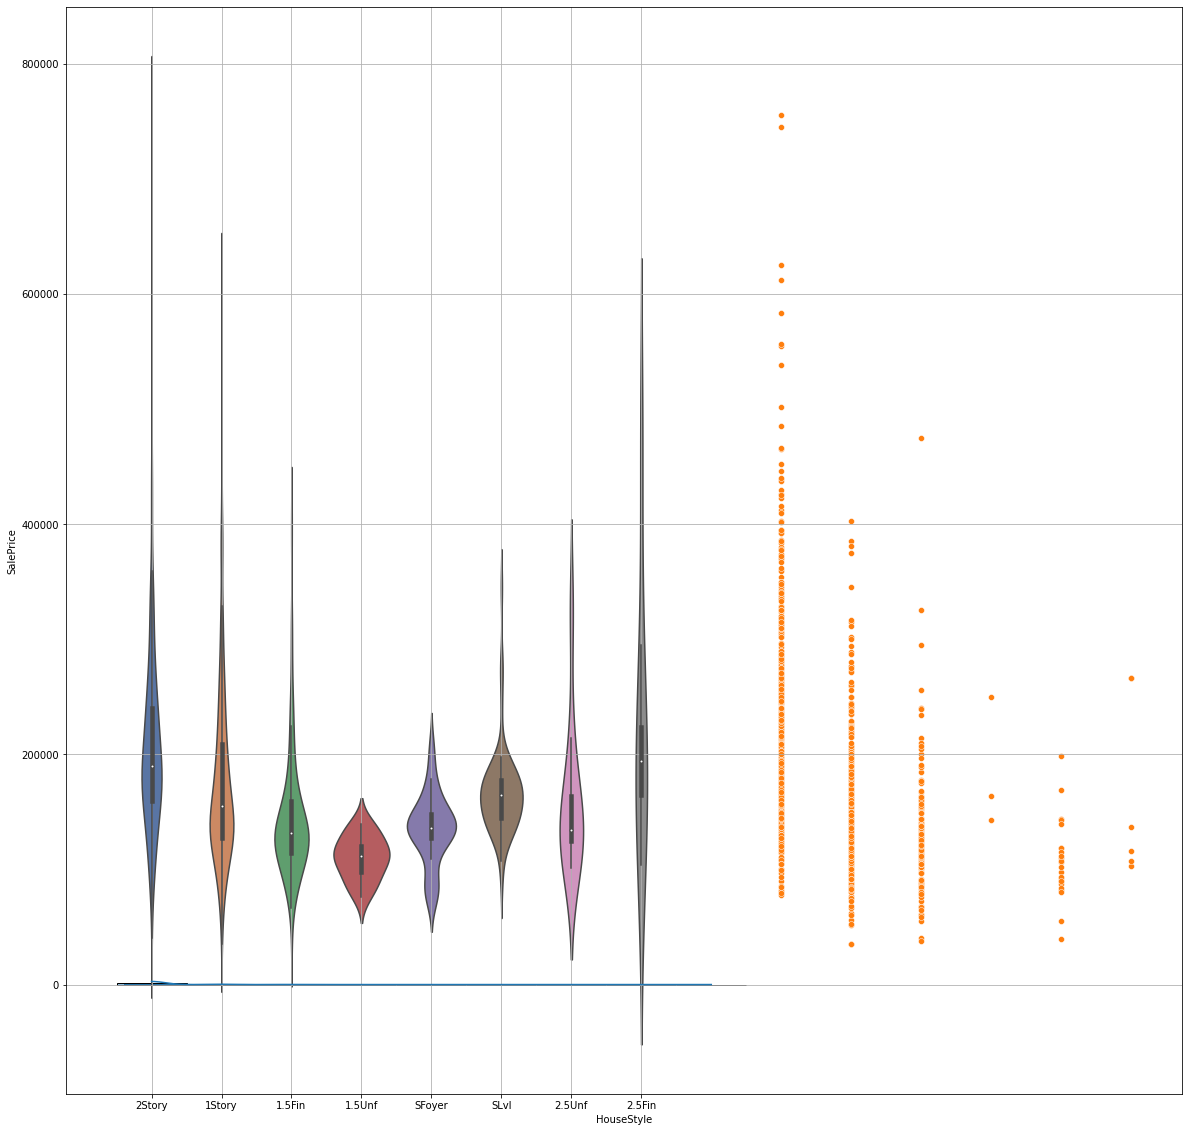

In [8]:
fig, ax = plt.subplots(figsize=(20,20))

sns.countplot(x=train_data['SaleCondition'])
sns.histplot(x=train_data['SaleType'], kde=True, ax=ax)
sns.violinplot(x=train_data['HouseStyle'], y=train_data["SalePrice"], palette='deep', ax=ax )
sns.scatterplot(x=train_data["Foundation"], y=train_data["SalePrice"], palette='deep', ax=ax)

plt.grid()

In [9]:
train_data.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
# It will list the name of all columns and will visit through 
# to replace all the NaN with some mean and mode values of the column.

def Fill_Missing_Values(data):
    for i in data.columns:
        if((data[i].dtype=='int64') or (data[i].dtype == "float64")):
            data[i].fillna(data[i].mean(), inplace=True)
        else:
            data[i].fillna(data[i].mode()[0], inplace=True)
            
Fill_Missing_Values(train_data)
Fill_Missing_Values(test_data)

<AxesSubplot:>

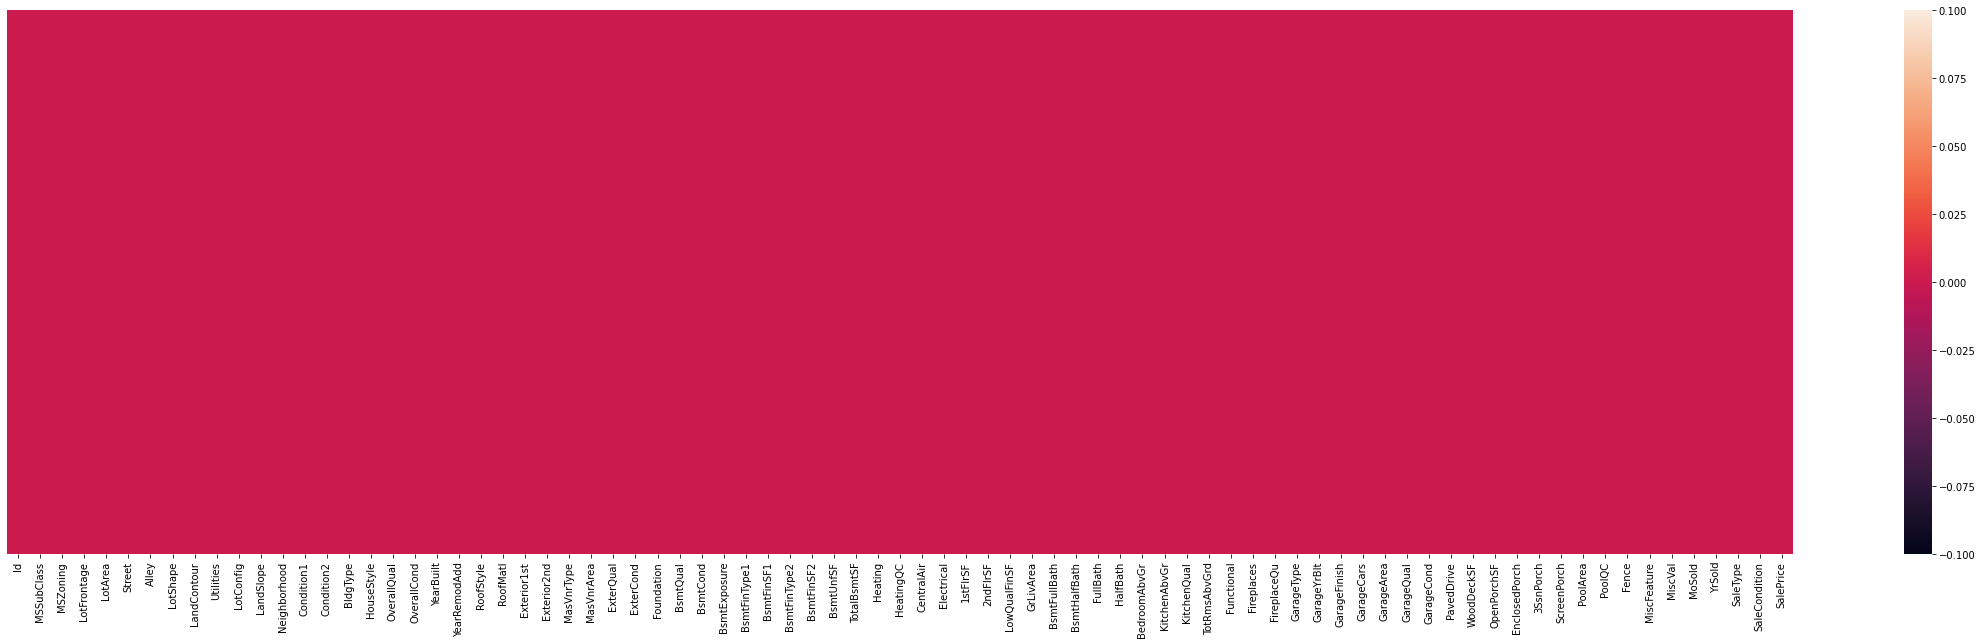

In [11]:
fig, ax = plt.subplots(figsize=(40,10))
sns.heatmap(data=train_data.isnull(), yticklabels = False, ax=ax)
# sns.heatmap(data=test_data.isnull(), yticklabels=False, ax=ax)

In [12]:
# train_data.columns
col = ['Id','Alley','LotConfig','BldgType','MasVnrType','MasVnrArea', 'ExterQual', 'ExterCond',
 'BsmtExposure','BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 
 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','HeatingQC','BsmtFullBath','BsmtHalfBath','TotRmsAbvGrd',
 'FireplaceQu', 'GarageType','GarageQual','GarageCond', 'PavedDrive', 'WoodDeckSF','OpenPorchSF',
 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolQC','Fence','MiscFeature', 'MiscVal', 'MoSold',]

In [13]:
train_data.drop(col,axis=1, inplace=True)
test_data.drop(col, axis=1, inplace=True)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [15]:
# Object data types
# train_data.columns
from sklearn.preprocessing import OrdinalEncoder

ordinal_Col =  ['MSZoning','Street','LotShape','LandContour','Utilities', 'LandSlope','Neighborhood',
 'Condition1','Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
 'Foundation','BsmtQual','CentralAir','Electrical','KitchenQual','Functional','GarageFinish' 
 'SaleType','SaleCondition']

#MSZoning
# print(train_data['Street'].unique())
OE = OrdinalEncoder(categories = [train_data['MSZoning'].unique()])
train_data['MSZoning'] = OE.fit_transform(train_data[['MSZoning']])
test_data['MSZoning'] = OE.fit_transform(test_data[['MSZoning']]) 

# Street
OE = OrdinalEncoder(categories = [train_data['Street'].unique()])
train_data['Street'] = OE.fit_transform(train_data[['Street']])
test_data['Street'] = OE.fit_transform(test_data[['Street']]) 

#LotShape
OE = OrdinalEncoder(categories = [train_data['LotShape'].unique()])
train_data['LotShape'] = OE.fit_transform(train_data[['LotShape']])
test_data['LotShape'] = OE.fit_transform(test_data[['LotShape']]) 

#LandContour
OE = OrdinalEncoder(categories = [train_data['LandContour'].unique()])
train_data['LandContour'] = OE.fit_transform(train_data[['LandContour']])
test_data['LandContour'] = OE.fit_transform(test_data[['LandContour']])

#Utilities
OE = OrdinalEncoder(categories = [train_data['Utilities'].unique()])
train_data['Utilities'] = OE.fit_transform(train_data[['Utilities']])
test_data['Utilities'] = OE.fit_transform(test_data[['Utilities']])

#LandSlope
OE = OrdinalEncoder(categories = [train_data['LandSlope'].unique()])
train_data['LandSlope'] = OE.fit_transform(train_data[['LandSlope']])
test_data['LandSlope'] = OE.fit_transform(test_data[['LandSlope']])

#Neighborhood
OE = OrdinalEncoder(categories = [train_data['Neighborhood'].unique()])
train_data['Neighborhood'] = OE.fit_transform(train_data[['Neighborhood']])
test_data['Neighborhood'] = OE.fit_transform(test_data[['Neighborhood']])

#Condition1
OE = OrdinalEncoder(categories = [train_data['Condition1'].unique()])
train_data['Condition1'] = OE.fit_transform(train_data[['Condition1']])
test_data['Condition1'] = OE.fit_transform(test_data[['Condition1']])
                                  
# Condition2
OE = OrdinalEncoder(categories = [train_data['Condition2'].unique()])
train_data['Condition2'] = OE.fit_transform(train_data[['Condition2']])
test_data['Condition2'] = OE.fit_transform(test_data[['Condition2']])
                                  
# HouseStyle
OE = OrdinalEncoder(categories = [train_data['HouseStyle'].unique()])
train_data['HouseStyle'] = OE.fit_transform(train_data[['HouseStyle']])
test_data['HouseStyle'] = OE.fit_transform(test_data[['HouseStyle']])
                                  
# RoofStyle
OE = OrdinalEncoder(categories = [train_data['RoofStyle'].unique()])
train_data['RoofStyle'] = OE.fit_transform(train_data[['RoofStyle']])
test_data['RoofStyle'] = OE.fit_transform(test_data[['RoofStyle']])                                  
                                
#RoofMatl
OE = OrdinalEncoder(categories = [train_data['RoofMatl'].unique()])
train_data['RoofMatl'] = OE.fit_transform(train_data[['RoofMatl']])
test_data['RoofMatl'] = OE.fit_transform(test_data[['RoofMatl']])                                   
  
#Exterior1st
OE = OrdinalEncoder(categories = [train_data['Exterior1st'].unique()])
train_data['Exterior1st'] = OE.fit_transform(train_data[['Exterior1st']])
test_data['Exterior1st'] = OE.fit_transform(test_data[['Exterior1st']])                                   
                                
                                  
#Exterior2nd
OE = OrdinalEncoder(categories = [train_data['Exterior2nd'].unique()])
train_data['Exterior2nd'] = OE.fit_transform(train_data[['Exterior2nd']])
test_data['Exterior2nd'] = OE.fit_transform(test_data[['Exterior2nd']])                                   
                   
# Foundation 
OE = OrdinalEncoder(categories = [train_data['Foundation'].unique()])
train_data['Foundation'] = OE.fit_transform(train_data[['Foundation']])
test_data['Foundation'] = OE.fit_transform(test_data[['Foundation']])                                  
                                      
#BsmtQual
OE = OrdinalEncoder(categories = [train_data['BsmtQual'].unique()])
train_data['BsmtQual'] = OE.fit_transform(train_data[['BsmtQual']])
test_data['BsmtQual'] = OE.fit_transform(test_data[['BsmtQual']])                                   
       
#BsmtCond
OE = OrdinalEncoder(categories = [train_data['BsmtCond'].unique()])
train_data['BsmtCond'] = OE.fit_transform(train_data[['BsmtCond']])
test_data['BsmtCond'] = OE.fit_transform(test_data[['BsmtCond']])

# CentralAir
OE = OrdinalEncoder(categories = [train_data['CentralAir'].unique()])
train_data['CentralAir'] = OE.fit_transform(train_data[['CentralAir']])
test_data['CentralAir'] = OE.fit_transform(test_data[['CentralAir']])            
                  
#Electrical
OE = OrdinalEncoder(categories = [train_data['Electrical'].unique()])
train_data['Electrical'] = OE.fit_transform(train_data[['Electrical']])
test_data['Electrical'] = OE.fit_transform(test_data[['Electrical']])                                    

#KitchenQual
OE = OrdinalEncoder(categories = [train_data['KitchenQual'].unique()])
train_data['KitchenQual'] = OE.fit_transform(train_data[['KitchenQual']])
test_data['KitchenQual'] = OE.fit_transform(test_data[['KitchenQual']])
 
#Functional
OE = OrdinalEncoder(categories = [train_data['Functional'].unique()])
train_data['Functional'] = OE.fit_transform(train_data[['Functional']])
test_data['Functional'] = OE.fit_transform(test_data[['Functional']])
            
#GarageFinish
OE = OrdinalEncoder(categories = [train_data['GarageFinish'].unique()])
train_data['GarageFinish'] = OE.fit_transform(train_data[['GarageFinish']])
test_data['GarageFinish'] = OE.fit_transform(test_data[['GarageFinish']])                                  

#SaleType
OE = OrdinalEncoder(categories = [train_data['SaleType'].unique()])
train_data['SaleType'] = OE.fit_transform(train_data[['SaleType']])
test_data['SaleType'] = OE.fit_transform(test_data[['SaleType']])                                  

# SaleCondition
OE = OrdinalEncoder(categories = [train_data['SaleCondition'].unique()])
train_data['SaleCondition'] = OE.fit_transform(train_data[['SaleCondition']])
test_data['SaleCondition'] = OE.fit_transform(test_data[['SaleCondition']])                                  


In [16]:
Level_col = ['Street' , 'SaleType', 'CentralAir']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
def encode_catagorical_columns(train, test):
    for col in Level_col:
        train[col] = encoder.fit_transform(train[col])
        test[col]  = encoder.transform(test[col])
encode_catagorical_columns(train_data, test_data)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   Utilities      1460 non-null   float64
 8   LandSlope      1460 non-null   float64
 9   Neighborhood   1460 non-null   float64
 10  Condition1     1460 non-null   float64
 11  Condition2     1460 non-null   float64
 12  HouseStyle     1460 non-null   float64
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   float64
 18  RoofMatl

In [18]:
train_data['BsmtRating'] = train_data['BsmtCond'] * train_data['BsmtQual']
train_data['OverallRating'] = train_data['OverallCond'] * train_data['OverallQual']
# train_data['BsmtFinTypeRating'] = train_data['BsmtFinType1'] * train_data['BsmtFinType2']

# train_data['BsmtBath'] = train_data['BsmtFullBath'] + train_data['BsmtHalfBath']
train_data['Bath'] = train_data['FullBath'] + train_data['HalfBath']
# train_data['PorchArea'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + train_data['3SsnPorch'] + train_data['ScreenPorch']

test_data['BsmtRating'] = test_data['BsmtCond'] * test_data['BsmtQual']
test_data['OverallRating'] = test_data['OverallCond'] * test_data['OverallQual']
# test_data['BsmtFinTypeRating'] = test_data['BsmtFinType1'] * test_data['BsmtFinType2']

# test_data['BsmtBath'] = test_data['BsmtFullBath'] + test_data['BsmtHalfBath']
test_data['Bath'] = test_data['FullBath'] + test_data['HalfBath']
# test_data['PorchArea'] = test_data['OpenPorchSF'] + test_data['EnclosedPorch'] + test_data['3SsnPorch'] + test_data['ScreenPorch']


In [19]:
drop_col = ['FullBath', 'HalfBath','BsmtCond','BsmtQual', 'OverallCond','OverallQual']

train_data.drop(drop_col,axis=1, inplace=True)
test_data.drop(drop_col,axis=1, inplace=True)

train_data.shape

(1460, 43)

In [20]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
ft = FunctionTransformer(func=np.log1p)
pt = PowerTransformer()

train_data['LotArea'] = ft.fit_transform(train_data['LotArea'])
test_data['LotArea'] = ft.transform(test_data['LotArea'])

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


y = train_data['SalePrice']
X = train_data.drop(['SalePrice'], axis=1)

candidate_max_leaf_nodes = [250]
#model = LinearRegression()

for node in candidate_max_leaf_nodes:
    model = RandomForestRegressor(max_leaf_nodes=node,)
    model.fit(X, y)
    score = cross_val_score(model, X, y, cv=10)
    print(score.mean())

0.8463780121453436


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   float64
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   int64  
 5   LotShape       1459 non-null   float64
 6   LandContour    1459 non-null   float64
 7   Utilities      1459 non-null   float64
 8   LandSlope      1459 non-null   float64
 9   Neighborhood   1459 non-null   float64
 10  Condition1     1459 non-null   float64
 11  Condition2     1459 non-null   float64
 12  HouseStyle     1459 non-null   float64
 13  YearBuilt      1459 non-null   int64  
 14  YearRemodAdd   1459 non-null   int64  
 15  RoofStyle      1459 non-null   float64
 16  RoofMatl       1459 non-null   float64
 17  Exterior1st    1459 non-null   float64
 18  Exterior

In [23]:
# test_id = test_data['Id']
price = model.predict(test_data)
submission = pd.DataFrame({
    "Id": test_Id,
    "SalePrice": price
})

submission.to_csv("submission.csv", index=False)
submission.sample(10)

,Id,SalePrice
1377,2838,147499.046830
1075,2536,238961.660832
606,2067,145217.443159
1347,2808,146119.019198
369,1830,152547.229612
50,1511,146833.799038
903,2364,148235.580974
880,2341,217943.558932
1299,2760,129452.323025
1437,2898,149409.613311
